# Supervised Learning - Project 2

## The Titanic Dataset

The Titanic dataset is a famous dataset in the field of data science and machine learning, often used for teaching classification algorithms. It contains data about the passengers aboard the RMS Titanic, which famously sank on its maiden voyage in 1912. Here's a detailed description:

### Overview of the Titanic Dataset
1. **Historical Context**:
   - The dataset is based on the real passenger list of the RMS Titanic. The Titanic was a British passenger liner that sank after colliding with an iceberg, leading to the deaths of more than 1,500 passengers and crew, making it one of the deadliest commercial peacetime maritime disasters in history.

2. **Contents**:
   - The dataset includes various information about the passengers, which are typically used to predict survival outcomes.
   - Common features in the dataset include:
     - `PassengerId`: Unique ID for each passenger.
     - `Survived`: Survival status (0 = No, 1 = Yes).
     - `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
     - `Name`: Passenger's name.
     - `Sex`: Passenger's sex.
     - `Age`: Passenger's age.
     - `SibSp`: Number of siblings/spouses aboard.
     - `Parch`: Number of parents/children aboard.
     - `Ticket`: Ticket number.
     - `Fare`: Passenger fare.
     - `Cabin`: Cabin number.
     - `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

3. **Usage**:
   - Widely used for binary classification tasks—predicting whether a passenger survived or not based on features like age, sex, class, etc.
   - Great for practicing data preprocessing, exploratory data analysis, and feature engineering.

### Importance in Machine Learning
- **Real-World Example**: Provides a real-world scenario where machine learning can be applied.
- **Data Cleaning and Preprocessing**: The dataset requires significant preprocessing, making it a good exercise for data cleaning and preparation techniques.
- **Feature Engineering**: Offers opportunities to create new features and transform existing ones.
- **Binary Classification**: Serves as an introductory problem for binary classification algorithms.
- **Handling Imbalanced Data**: The survival rate in the dataset is imbalanced, providing a practical challenge.

### Educational Value
- **Beginner-Friendly**: It is often used in beginner tutorials and courses for data science and machine learning.
- **Community and Competitions**: The dataset is famously used in Kaggle competitions, offering a community and resources for learning and comparison.


In [1]:
# Get the data from internet... (so you will need an active internet connection)
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

zsh:1: command not found: wget


## Notes on the Imports

### ```seaborn```

Seaborn is a popular data visualization library in Python, known for its ability to create aesthetically pleasing and informative statistical graphics. It's built on top of Matplotlib, another widely-used Python plotting library, and integrates closely with Pandas data structures. Here's a detailed description:

### Overview of Seaborn
1. **Purpose**:
   - Seaborn is designed for exploratory data analysis and is particularly suited for visualizing complex datasets. It simplifies the process of creating rich, informative, and attractive visualizations.

2. **Functionality**:
   - The library provides a high-level interface for drawing attractive statistical graphics, including a variety of plot types like scatter plots, line plots, bar charts, box plots, violin plots, and heatmaps.
   - It's optimized for working with Pandas DataFrames, efficiently handling both categorical and numerical data.

### Key Features
1. **Plotting Functions**:
   - Seaborn includes functions for fitting and visualizing linear regression models, plotting statistical time series data, and creating various kinds of bar plots and box plots.
   - It supports multi-plot grids that facilitate the creation of complex visualizations.

2. **Style Control**:
   - It offers advanced customization options for styling plots, including color palettes, themes, and aesthetics.
   - The default color themes and styles in Seaborn are designed to be more aesthetically pleasing and modern.

3. **Integration with Matplotlib**:
   - While it functions as an independent data visualization tool, Seaborn is built on top of Matplotlib and can be used in conjunction with Matplotlib's functionality for further customization.

4. **Statistical Estimation**:
   - Seaborn goes beyond basic plotting; it includes functions for statistical estimation and is able to summarize data from multiple observations while showing inferential statistics.

### Example Usage
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset("tips")

# Create a simple visualization
sns.scatterplot(x="total_bill", y="tip", data=tips)

plt.show()
```

### Use Cases
- **Data Analysis**: Ideal for exploratory data analysis and getting insights from data through visualizations.
- **Academic and Professional Reporting**: Widely used in academic fields and industry for creating visually appealing plots for reports and presentations.
- **Statistical Analysis**: Helpful in statistical analysis by providing an intuitive interface for plotting statistical models.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

In [4]:
# Data Exploration -- we can do a lot more than this of course
print(df.head())
print(df.describe())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [5]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Data Cleaning
X_train.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'], inplace=True)
X_test.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'], inplace=True)

In [8]:
X_train['Embarked'].fillna('S', inplace=True)
X_test['Embarked'].fillna('S', inplace=True)

/var/folders/10/vxfsvvhs64qchr0vm5r4xsz80000gn/T/ipykernel_95880/1136608277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Embarked'].fillna('S', inplace=True)
/var/folders/10/vxfsvvhs64qchr0vm5r4xsz80000gn/T/ipykernel_95880/1136608277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [9]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)

/var/folders/10/vxfsvvhs64qchr0vm5r4xsz80000gn/T/ipykernel_95880/3322515162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
/var/folders/10/vxfsvvhs64qchr0vm5r4xsz80000gn/T/ipykernel_95880/3322515162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [10]:
# Feature Engineering
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1
X_train['IsAlone'] = 0
X_train.loc[X_train['FamilySize'] == 1, 'IsAlone'] = 1

In [11]:
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1
X_test['IsAlone'] = 0
X_test.loc[X_test['FamilySize'] == 1, 'IsAlone'] = 1

In [12]:
# Imputation
imputer = SimpleImputer(strategy='most_frequent')
X_train[['Sex', 'Embarked']] = imputer.fit_transform(X_train[['Sex', 'Embarked']])
X_test[['Sex', 'Embarked']] = imputer.transform(X_test[['Sex', 'Embarked']])

In [13]:
# Feature Selection -- highly correlated with the FamilySize variable which we engineered
X_train.drop(columns=['SibSp', 'Parch'], inplace=True)
X_test.drop(columns=['SibSp', 'Parch'], inplace=True)

In [14]:
X_train

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
331,1,male,45.5,28.5000,S,1,1
733,2,male,23.0,13.0000,S,1,1
382,3,male,32.0,7.9250,S,1,1
704,3,male,26.0,7.8542,S,2,0
813,3,female,6.0,31.2750,S,7,0
...,...,...,...,...,...,...,...
106,3,female,21.0,7.6500,S,1,1
270,1,male,28.0,31.0000,S,1,1
860,3,male,41.0,14.1083,S,3,0
435,1,female,14.0,120.0000,S,4,0


In [15]:
# Convert categorical variables to numerical
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1}).astype(int)
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1}).astype(int)
X_train = pd.get_dummies(X_train, columns=['Embarked'])
X_test = pd.get_dummies(X_test, columns=['Embarked'])

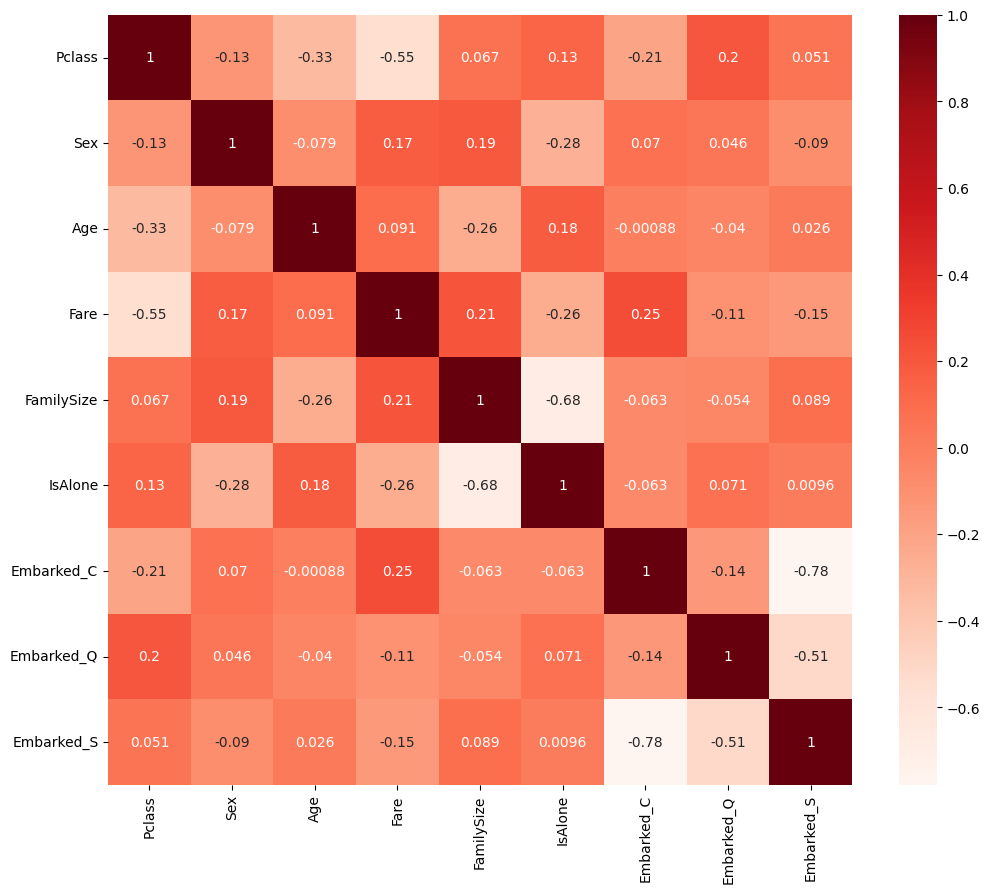

In [16]:
# Examine correlation matrix
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
# Dealing with Imbalanced Classes
ros = RandomOverSampler()
rus = RandomUnderSampler()
smote = SMOTE()

In [18]:
# Apply resampling only to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
# Data Scaling
scaler = StandardScaler()
X_train_ros_scaled = scaler.fit_transform(X_train_ros)
X_train_rus_scaled = scaler.fit_transform(X_train_rus)
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_orig_scaled = scaler.transform(X_test)

In [20]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr, param_grid, cv=5)
grid_lr.fit(X_train_ros_scaled, y_train_ros)

print('Best Parameters for Logistic Regression:', grid_lr.best_params_)

param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid, cv=5)
grid_dt.fit(X_train_ros_scaled, y_train_ros)

print('Best Parameters for Decision Tree:', grid_dt.best_params_)

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7, 10]}
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(X_train_ros_scaled, y_train_ros)

print('Best Parameters for Random Forest:', grid_rf.best_params_)

Best Parameters for Logistic Regression: {'C': 1}
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2}
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}


In [21]:
# Final Model
final_model = grid_rf.best_estimator_
final_model.fit(X_train_ros_scaled, y_train_ros)

RandomForestClassifier(max_depth=10)

In [22]:
# Model Evaluation on Test Set
y_pred = final_model.predict(X_test_orig_scaled)
print('Final Model Evaluation on Test Set')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Final Model Evaluation on Test Set
Accuracy: 0.8156424581005587
Precision: 0.7662337662337663
Recall: 0.7972972972972973
F1 Score: 0.7814569536423841


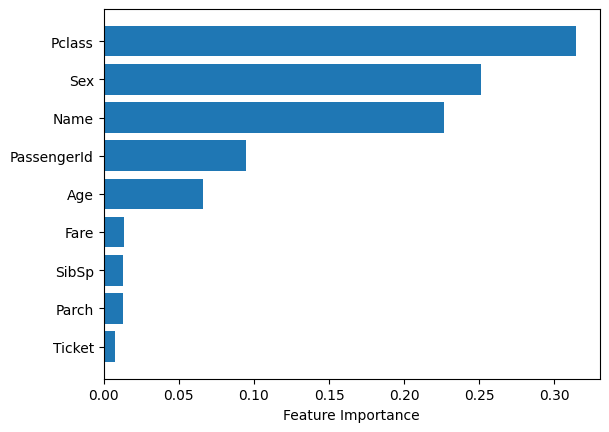

In [23]:
# Feature Importance
feature_importance = final_model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

import matplotlib.pyplot as plt
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()